<center><span style="color:yellow"><h1><i> DICOM </i></h1></span></center>

### Importe las librerias necesarias

In [1]:
import pydicom
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np

### 1)	Ubique la carpeta con los archivos DICOM y muestre los nombres de los diferentes archivos

In [5]:
ruta = r"C:\Users\budgi\OneDrive\Documentos\TrabajosBi\UdeA\Informática 2\Parcial3\Talleres\datos"  # cambia esta ruta según tu caso

if os.path.exists(ruta):
    archivos = os.listdir(ruta)
    print("Archivos en la carpeta:")
    for archivo in archivos:
        print(archivo)
else:
    print("La carpeta no existe.")

Archivos en la carpeta:
000000.dcm
000001.dcm
000002.dcm
000003.dcm
000004.dcm
000005.dcm
000006.dcm
000007.dcm
000008.dcm
000009.dcm
000010.dcm
000011.dcm
000012.dcm
000013.dcm
000014.dcm
000015.dcm
000016.dcm
000017.dcm
000018.dcm
000019.dcm
000020.dcm
000021.dcm
000022.dcm
000023.dcm
000024.dcm
000025.dcm
000026.dcm
000027.dcm
000028.dcm
000029.dcm
000030.dcm
000031.dcm
000032.dcm
000033.dcm
000034.dcm
000035.dcm
000036.dcm
000037.dcm
000038.dcm
000039.dcm
000040.dcm
000041.dcm
000042.dcm
000043.dcm
000044.dcm
000045.dcm
000046.dcm
000047.dcm
000048.dcm
000049.dcm
000050.dcm
000051.dcm
000052.dcm
000053.dcm
000054.dcm
000055.dcm
000056.dcm
000057.dcm
000058.dcm
000059.dcm
000060.dcm
000061.dcm
000062.dcm
000063.dcm
000064.dcm
000065.dcm
000066.dcm
000067.dcm
000068.dcm
000069.dcm
000070.dcm
000071.dcm
000072.dcm
000073.dcm
000074.dcm
000075.dcm
000076.dcm
000077.dcm
000078.dcm
000079.dcm
000080.dcm
000081.dcm
000082.dcm
000083.dcm
000084.dcm
000085.dcm
000086.dcm
000087.dcm
000088.d

### 2)	Lea todos los archivos alli contenidos e ingrese los datasets en una lista

In [6]:
datasets = []
for archivo in archivos:
        dcm_data = pydicom.dcmread('datos/'+ archivo)
        datasets.append(dcm_data)

### 3)	Si los archivos aparecen desordenados, primero verifique de cualquiera de los datasets en la lista , si tiene el dataelement ImagePositionPatient o SliceLocation y ordene por alguno de estos parametros los datasets (fijarse en que eje esta variando los datasets)

In [9]:
corte1= pydicom.dcmread('datos/000000.dcm')
corte2= pydicom.dcmread('datos/000001.dcm')
corte3= pydicom.dcmread('datos/000002.dcm')
print("POSICIONES")
print(corte1.ImagePositionPatient) 
print(corte2.ImagePositionPatient)
print(corte3.ImagePositionPatient)
print("SLICE LOCATION")
print(corte1.SliceLocation) 
print(corte2.SliceLocation)
print(corte3.SliceLocation)
print(corte1.SliceThickness) 
#ORDENAR
datasets.sort(key = lambda x: int(x.ImagePositionPatient[2]))
try:
    slice_thickness = np.abs(datasets[0].ImagePositionPatient[2] - datasets[1].ImagePositionPatient[2])
    print(slice_thickness)
except:
    slice_thickness = np.abs(datasets[0].SliceLocation - datasets[1].SliceLocation)

for s in datasets:
    s.SliceThickness = slice_thickness

POSICIONES
[-143.2177734375, -287.2177734375, -216]
[-143.2177734375, -287.2177734375, -228]
[-143.2177734375, -287.2177734375, -123]
SLICE LOCATION
-216
-228
-123
3
3.0


### 4) Muestre los dataelements de cualquier dataset

In [13]:
opcion = 0
# print(type(datasets[opcion]["PatientName"]))
# print(type(datasets[opcion].PatientName))
# print(f'Este seria toda la info asociada a un elemento del dataset {opcion} {datasets[1]["PatientName"]}')
# print(datasets[opcion]["PatientName"].VR)
# print(datasets[opcion]["PatientName"].tag)
# print(datasets[opcion]["PatientName"].value)
# print(datasets[opcion]["PatientName"].VM)
# print(datasets[opcion].pixel_array)

datasets[opcion]

Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 196
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002,0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.7085.2626.908349316384219817604111507456
(0002,0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002,0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002,0013) Implementation Version Name         SH: 'dcm4che-1.4.35'
-------------------------------------------------
(0008,0005) Specific Character Set              CS: 'ISO_IR 100'
(0008,0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL', 'CT_SOM5 SPI']
(0008,0016) SOP Class UID                       UI: CT Image Storage
(0008,0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.7085.2626.908349316384219817604111507456
(0008,0020) Study Date    

### 5)	Visualice la imagen de cualquiera de los datasets leidos , y muestre que profundidad de pixel (dtype), trae la matriz por defecto.

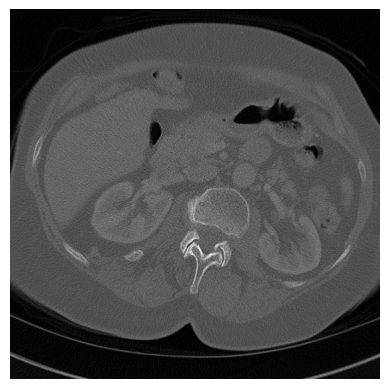

Profundidad de pixel: uint16
2889


In [17]:
img = datasets[opcion].pixel_array
plt.imshow(img, cmap= 'gray' )
plt.axis( 'off' )
plt.show()
print("Profundidad de pixel:", img.dtype)
print(img.max())

### 6) Genere el "sólido" a partir de todas las imágenes superpuestas 

In [20]:
volum=[]
for s in datasets:
  volum.append(s.pixel_array)

volum=np.stack(volum)
volum.shape

(99, 512, 512)

### 7)	Muestre en 3 suplots horizontales los cortes coronal , sagital y axial, con su respectivo titulo

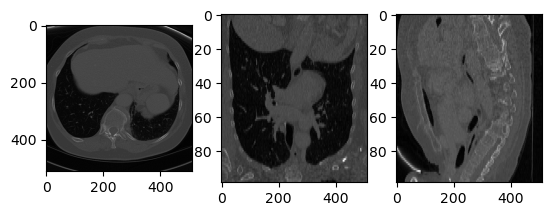

In [23]:
a = plt.subplot(131)
plt.imshow(volum[23,:,:], aspect=1, cmap='gray') # Axial
b = plt.subplot(132)
plt.imshow(volum[:,250,:],aspect=5.95, cmap='gray') # Coronal
c= plt.subplot(133)
plt.imshow(volum[:,:,256],aspect=5.95, cmap='gray') # Sagital
# a.set_aspect("auto")
plt.show()

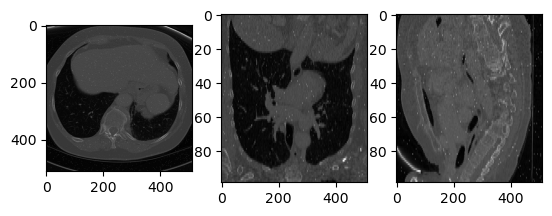

In [26]:
volum = volum.astype(np.int16)
volum[volum == -2000] = 0

# Convert to Hounsfield units (HU)
for slice_number in range(len(datasets)):
    intercept = datasets[slice_number].RescaleIntercept
    slope = datasets[slice_number].RescaleSlope

    if slope != 1:
        volum[slice_number] = slope * volum[slice_number].astype(np.float64)
        volum[slice_number] = volum[slice_number].astype(np.int16)
    volum[slice_number] += np.int16(intercept)
    # slope * Matriz + intecepto
stacked_slices=np.array(volum, dtype=np.int16)

a = plt.subplot(131)
plt.imshow(volum[23,:,:], aspect=1, cmap='gray') # Axial
b = plt.subplot(132)
plt.imshow(volum[:,250,:],aspect=5.95, cmap='gray') # Coronal
c= plt.subplot(133)
plt.imshow(volum[:,:,256],aspect=5.95, cmap='gray') # Sagital
# a.set_aspect("auto")
plt.show()

### 8) Extraiga toda la información del paciente asociado al estudio

In [30]:
def get_patient_info(ds):
    info = {
        'PatientName': getattr(ds, 'PatientName', ''),
        "nombre":datasets[opcion].PatientName,
        'PatientID': getattr(ds, 'PatientID', ''),
        'PatientBirthDate': getattr(ds, 'PatientBirthDate', ''),
        'PatientSex': getattr(ds, 'PatientSex', ''),
        'PatientAge': getattr(ds, 'PatientAge', ''),
        'StudyDate': getattr(ds, 'StudyDate', ''),
        'StudyDescription': getattr(ds, 'StudyDescription', ''),
        'Modality': getattr(ds, 'Modality', ''),
        'InstitutionName': getattr(ds, 'InstitutionName', '')
    }
    return info
get_patient_info(datasets[opcion])

{'PatientName': 'C3N-00247',
 'nombre': 'C3N-00247',
 'PatientID': 'C3N-00247',
 'PatientBirthDate': '',
 'PatientSex': 'F',
 'PatientAge': '077Y',
 'StudyDate': '20100227',
 'StudyDescription': 'CT CHEST W IV CONTRAST',
 'Modality': 'CT',
 'InstitutionName': ''}

### 9)	Los datos que esten anonimizados modifiquelos por información ficticia. y posteriormente los guarda

In [34]:
ds = datasets[opcion]
ds.PatientName = "Juanita"
ds.PatientID = "123456"
ds.PatientBirthDate = "19800101"

ds.save_as(r"datos/dataset_modificado.dcm")

### 10) Cree una función que grafique un histograma de la matriz (imagen) que le pase como argumento

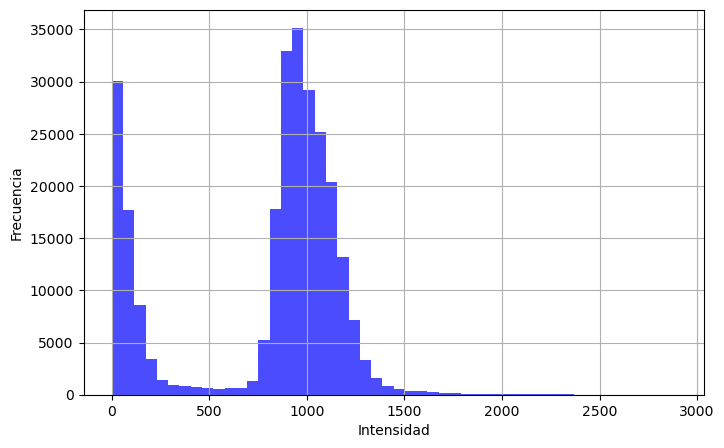

In [38]:
def hist(img):
    plt.figure(figsize=(8, 5))
    plt.hist(img.flatten(), bins=50, color='blue', alpha=0.7)
    plt.xlabel("Intensidad")
    plt.ylabel("Frecuencia")
    plt.grid(True)
    plt.show()
hist(img)

In [42]:
def hist(img):
    Hb2 = cv2.calcHist([img],[2],None,[20],[0,20])
    plt.figure(figsize=(8, 5))
    plt.plot(Hb2)
    plt.xlabel("Intensidad")
    plt.ylabel("Frecuencia")
    plt.grid(True)
    plt.show()
hist(img)

error: OpenCV(4.11.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\histogram.cpp:160: error: (-215:Assertion failed) j < nimages in function 'cv::histPrepareImages'


### 11) Cree un subplot horizontal de 3 tramas y en cada uno muestre un histograma de un corte diferente, con su resepctivo título

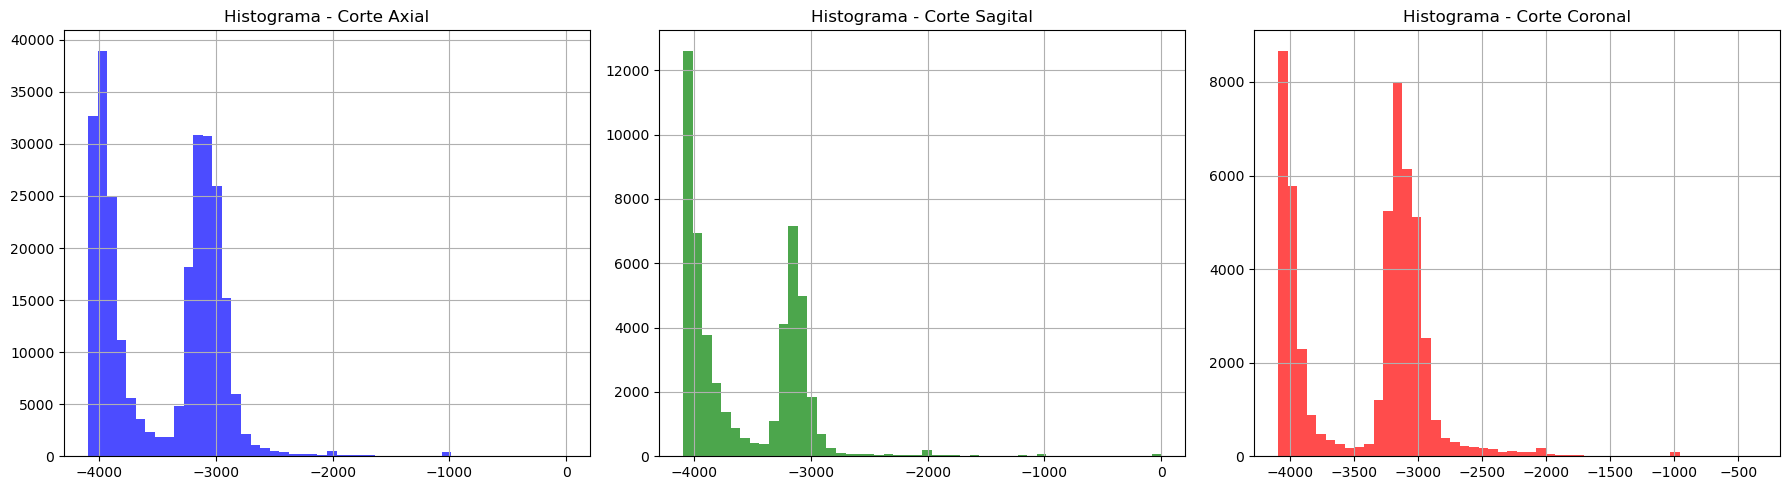

In [44]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

# Histograma del corte axial
ax1.hist(volum[30, :, :].flatten(), bins=50, color='blue', alpha=0.7)
ax1.set_title('Histograma - Corte Axial')
ax1.grid(True)

# Histograma del corte sagital
ax2.hist(volum[:, 30, :].flatten(), bins=50, color='green', alpha=0.7)
ax2.set_title('Histograma - Corte Sagital')
ax2.grid(True)

# Histograma del corte coronal
ax3.hist(volum[:, :, 30].flatten(), bins=50, color='red', alpha=0.7)
ax3.set_title('Histograma - Corte Coronal')
ax3.grid(True)

plt.tight_layout()
plt.show()